<a href="https://colab.research.google.com/github/smiledinisa/pytorch_learning/blob/master/torchaudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch is an open source deep learning platform that provides a seamless path from research prototyping（原型） to production deployment（部署） with GPU support.

Significant effort in solving machine learning problems goes into data preparation. torchaudio leverages PyTorch’s GPU support, and provides many tools to make data loading easy and more readable. In this tutorial, we will see how to load and preprocess data from a simple dataset.

For this tutorial, please make sure the matplotlib package is installed for easier visualization.

In [8]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 6.5MB/s 


In [9]:
import torch
import torchaudio
import matplotlib.pyplot as plt



In [10]:
!sudo apt-get install sox libsox-dev libsox-fmt-all

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsox-dev is already the newest version (14.4.2-3ubuntu0.18.04.1).
libsox-fmt-all is already the newest version (14.4.2-3ubuntu0.18.04.1).
sox is already the newest version (14.4.2-3ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [11]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [12]:
!ls


sample_data


Shape of waveform: torch.Size([2, 278756])
Sample rate of waveform: 44100


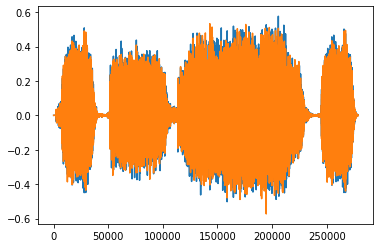

In [13]:
filename = "/content/sample_data/steam-train-whistle-daniel_simon.mp3"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy()) #转置后，输出。

Shape of spectrogram: torch.Size([2, 201, 1394])


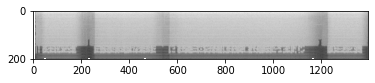

In [14]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

Shape of spectrogram: torch.Size([2, 128, 1394])


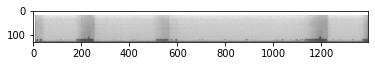

In [15]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

Shape of transformed waveform: torch.Size([1, 27876])


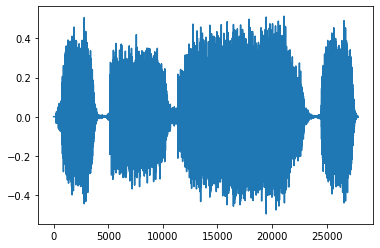

In [16]:
new_sample_rate = sample_rate/10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())